## Lab 2: Quasi-Geostrophic Vorticity Equation 
In this week's lab, we will use GFS model data to create 500 hPa analyses in support of our arguments for how shortwave and longwave troughs move relative to each other. 
<br />

<br />

### Useful Documentation
1. Xarray open_dataset:  https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html
2. Matplotlib contour: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html
3. Cartopy feature: https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html
4. Datetime: https://docs.python.org/3/library/datetime.html



<br />

### Instructions
So you can complete this week's lab, I have downloaded the 1200 UTC 15 February 2023 GFS forecast between forecast hours 0 (the 1200 UTC 15 February 2023 0-h analysis) and 168 (the day-seven forecast at 1200 UTC 22 February 2023), with data provided every six hours.  The location of these data is provided for you below, as is the filenaming convention if you wish to use a datetime object to select your time of interest.

Using these GFS data, create 500-hPa analyses of (at a minimum) geopotential height and absolute vorticity at two consecutive times.  Be sure that each of your maps depict at least one distinct shortwave trough and one distinct longwave trough.  Also, be sure your maps follow the "good map" guidelines, and do not forget to import the necessary packages before you start coding.

In [1]:
#Import needed modules
from datetime import datetime
from metpy.io import add_station_lat_lon
from metpy.plots import StationPlot, sky_cover
import numpy as np
import cartopy.crs as crs 
import cartopy
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import xarray as xr
from siphon.simplewebservice.iastate import IAStateUpperAir
import sys
from metpy.units import units
import metpy.calc as calc
import pandas as pd

In [2]:
# location of the data
data_location = "/data/AtmSci360/Synp2/Lab_2/"

In [3]:
#Function to grab data #02/20/23 for data
def process_upper_air_data(time):
  
    model_data = xr.open_dataset(f"{data_location}{time:%m%d%y_%H}_gfs.grib2", engine='cfgrib', filter_by_keys={'typeOfLevel': 'isobaricInhPa'})
    model_data=model_data.sel(isobaricInhPa=500)
    
    model_data = model_data.sel(latitude = slice(65,20))
    model_data = model_data.sel(longitude = slice(360-145,360-45))
    
    model_data['u'] = model_data["u"].metpy.convert_units('kt')
    model_data['v'] = model_data["v"].metpy.convert_units('kt')
    
    
    return model_data

In [4]:
#Plotting function for absolute vorticity and geopotential height
def plot_vort_gh(time, model_data):
   
    proj = crs.LambertConformal(central_longitude=-100, central_latitude=45)
    
 
    fig = plt.figure(figsize=(11.5,7),dpi=300)
    ax=plt.subplot(projection = proj)

    
    ax.add_feature(cfeature.LAND.with_scale('50m'), edgecolor = "black", facecolor='none',  linewidth=0.75, zorder=2)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor = "black",  facecolor='none', linewidth=0.75, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor = "grey", linestyle=":", facecolor='none', linewidth=0.5, zorder=1)
    ax.add_feature(cartopy.feature.BORDERS)
    
    
   
    ax.set_extent((-150, -50, 20, 70))
    
  
    smooth_heights = gaussian_filter(model_data["gh"].values,2)
    
   
    cont_h = plt.contour(model_data["longitude"].values, model_data["latitude"].values, smooth_heights, np.arange(0,10000,40),linewidths = 0.5,colors='k', transform=crs.PlateCarree())
    
    

    ax.clabel(cont_h, cont_h.levels, fmt=lambda v: format(v, '.0f'),fontsize=8)

    #Multiply           
    smooth_absv = gaussian_filter(model_data["absv"].values*10**5,2)
    

    cont = plt.contourf(model_data["longitude"].values, model_data["latitude"].values,smooth_absv,np.arange(-6,80,3), cmap='turbo', transform=crs.PlateCarree(), zorder=1, alpha=0.6)
           
    
    cbar = plt.colorbar(cont)
    cbar.set_label(("Absolute Vorticity 10$^{-5}$ s$^{-1}$"), size=10, weight="bold")
    
    
    wind_slice_x = slice(None, None, 14)
    wind_slice_y = slice(None, None, 14)
    
    ax.barbs(model_data["longitude"][wind_slice_x].values, model_data["latitude"][wind_slice_y].values,
             model_data["u"][wind_slice_x, wind_slice_y].values,
             model_data["v"][wind_slice_x, wind_slice_y].values,
             color='black',transform=crs.PlateCarree(),linewidth=0.6, length=4.25)
    
    plt.title(f"Valid: {time:%m/%d/%Y %H%M} UTC", size=7, loc="right")         
    plt.title(" 500 hpa Absolute Vorticity 10$^{-5}$ s$^{-1}$, Geopotential Height (black| dm), Wind Speed (barbs|kt)",size=7,weight="bold",loc="left")            
    

Can't create file '/data/AtmSci360/Synp2/Lab_2/022223_00_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/opt/tljh/user/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/data/AtmSci360/Synp2/Lab_2/022223_00_gfs.grib2.923a8.idx'
Can't read index file '/data/AtmSci360/Synp2/Lab_2/022223_00_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 544, in from_indexpath_or_filestream
    index_mtime = os.path.getmtime(indexpath)
  File "/opt/tljh/user/lib/python3.7/genericpath.py", 

Can't create file '/data/AtmSci360/Synp2/Lab_2/022223_06_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/opt/tljh/user/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/data/AtmSci360/Synp2/Lab_2/022223_06_gfs.grib2.923a8.idx'
Can't read index file '/data/AtmSci360/Synp2/Lab_2/022223_06_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 544, in from_indexpath_or_filestream
    index_mtime = os.path.getmtime(indexpath)
  File "/opt/tljh/user/lib/python3.7/genericpath.py", 

/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:982: ShapelyDeprecatio

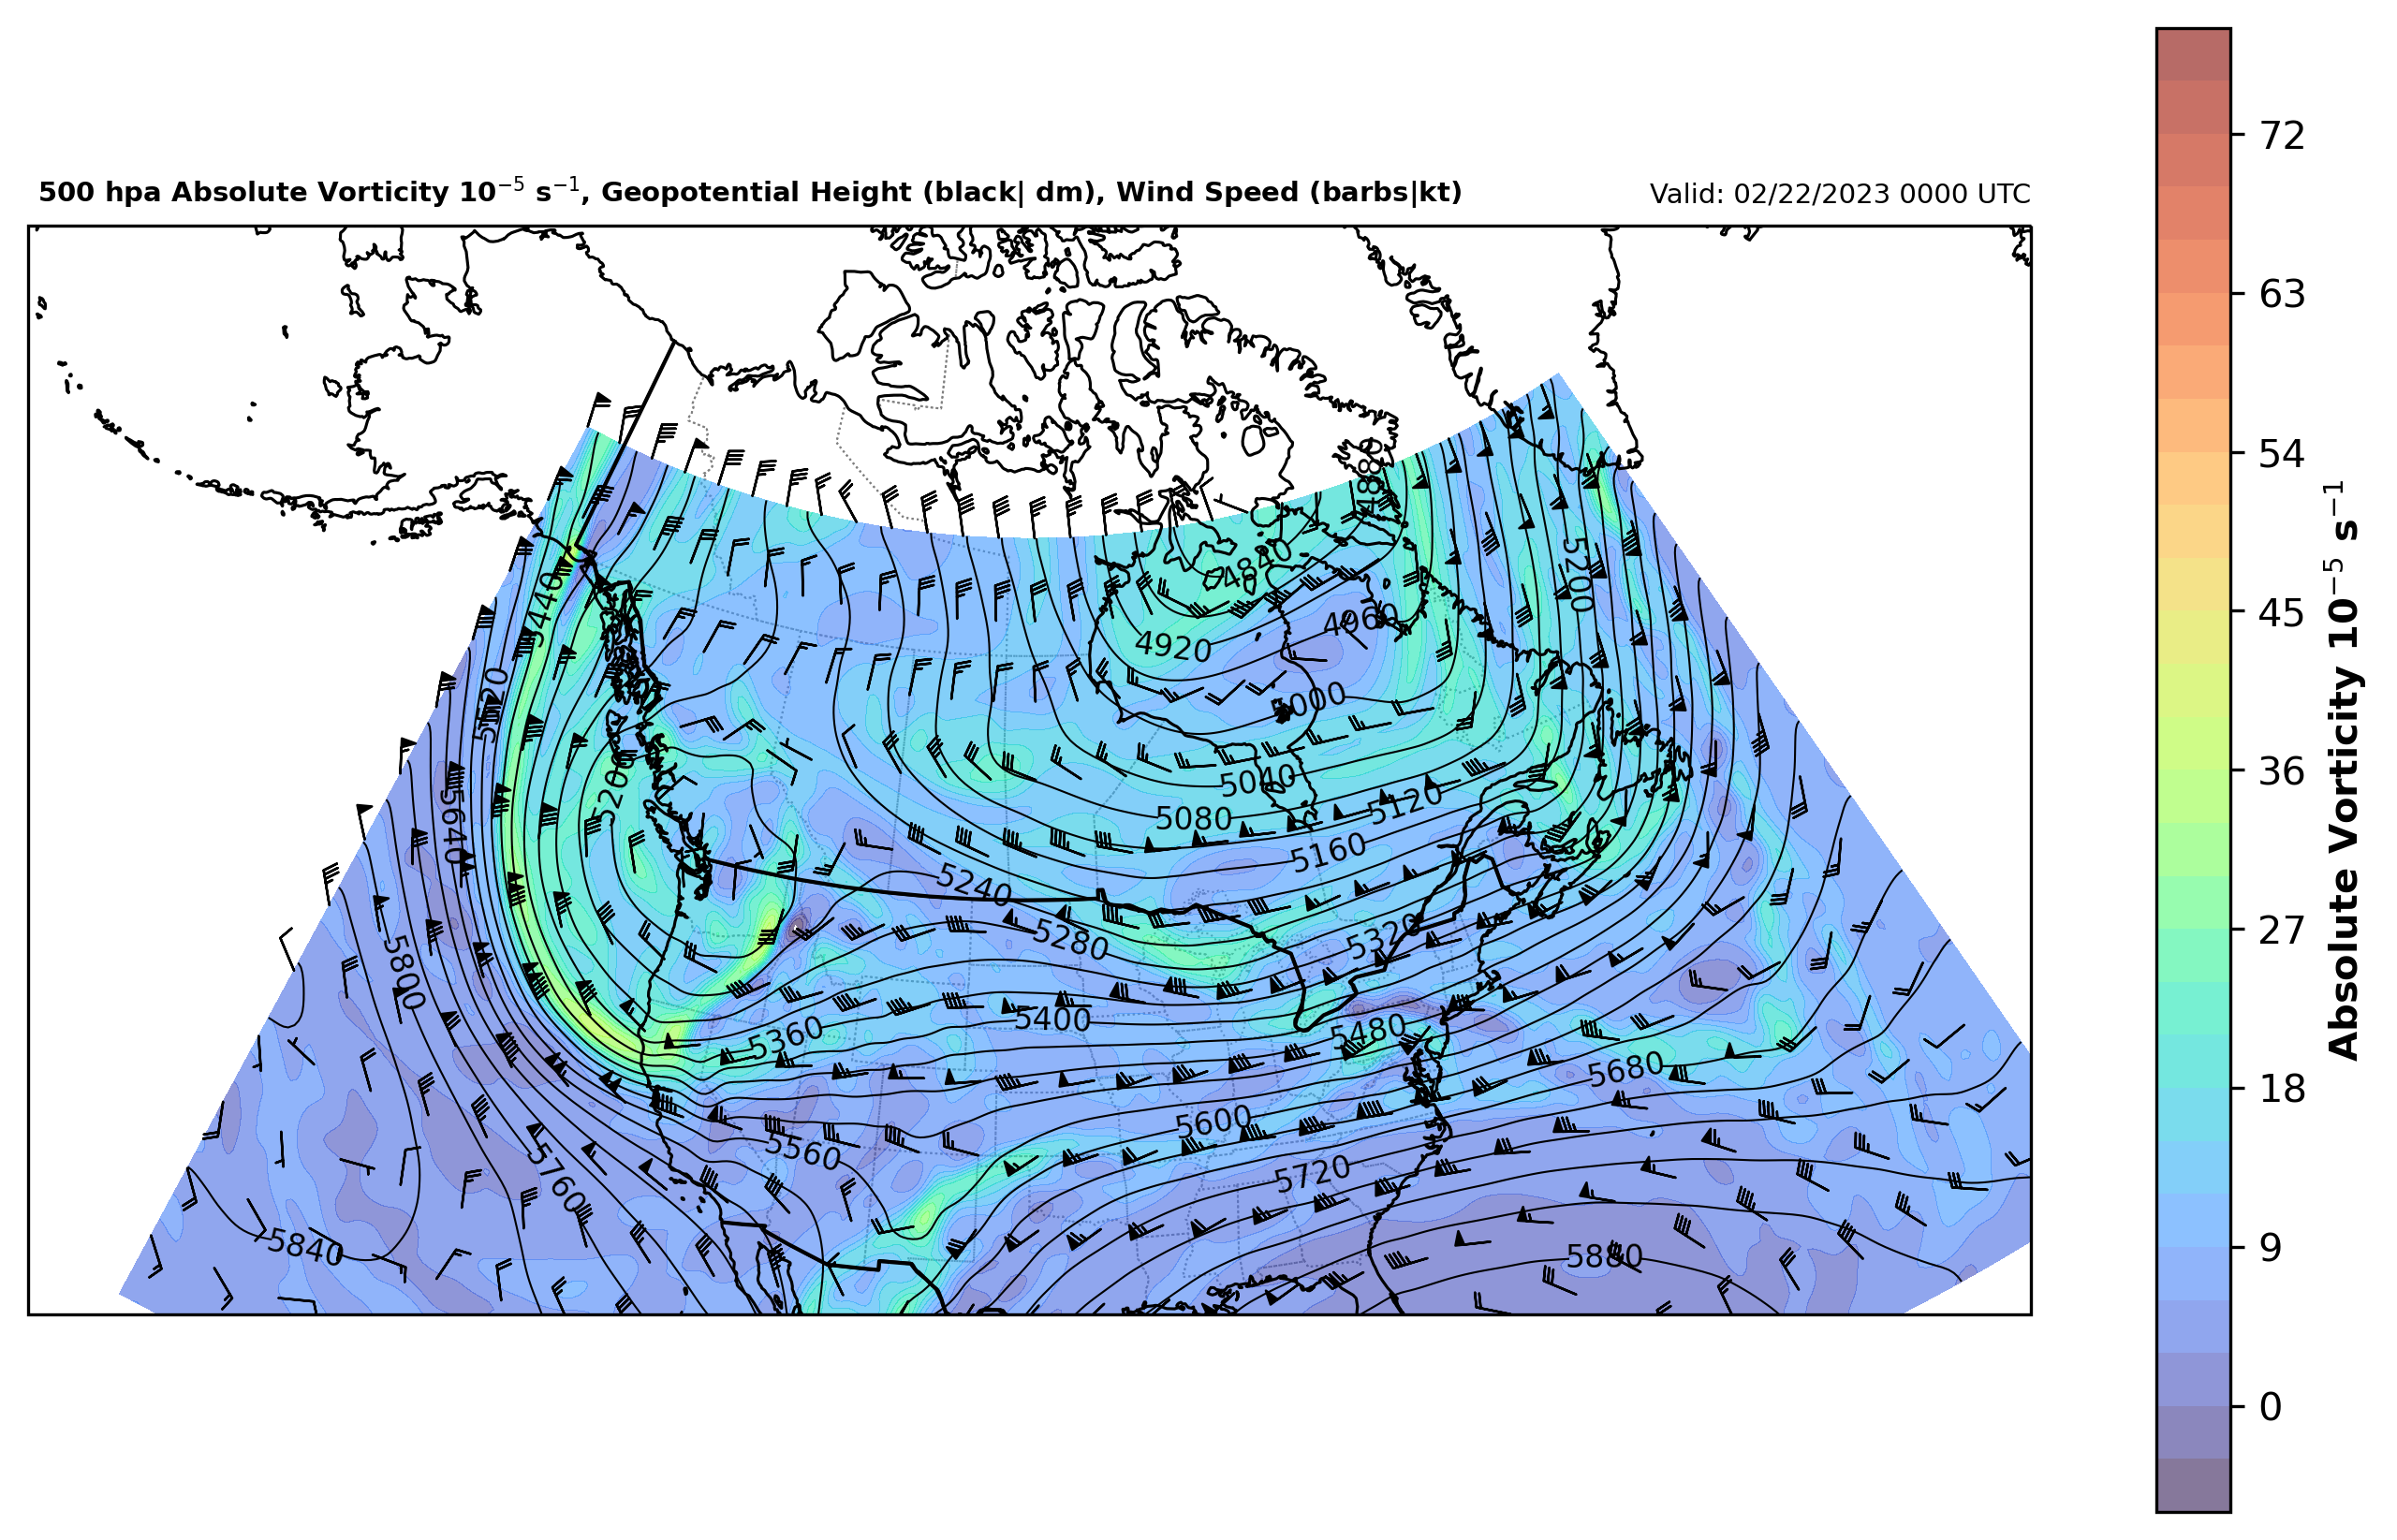

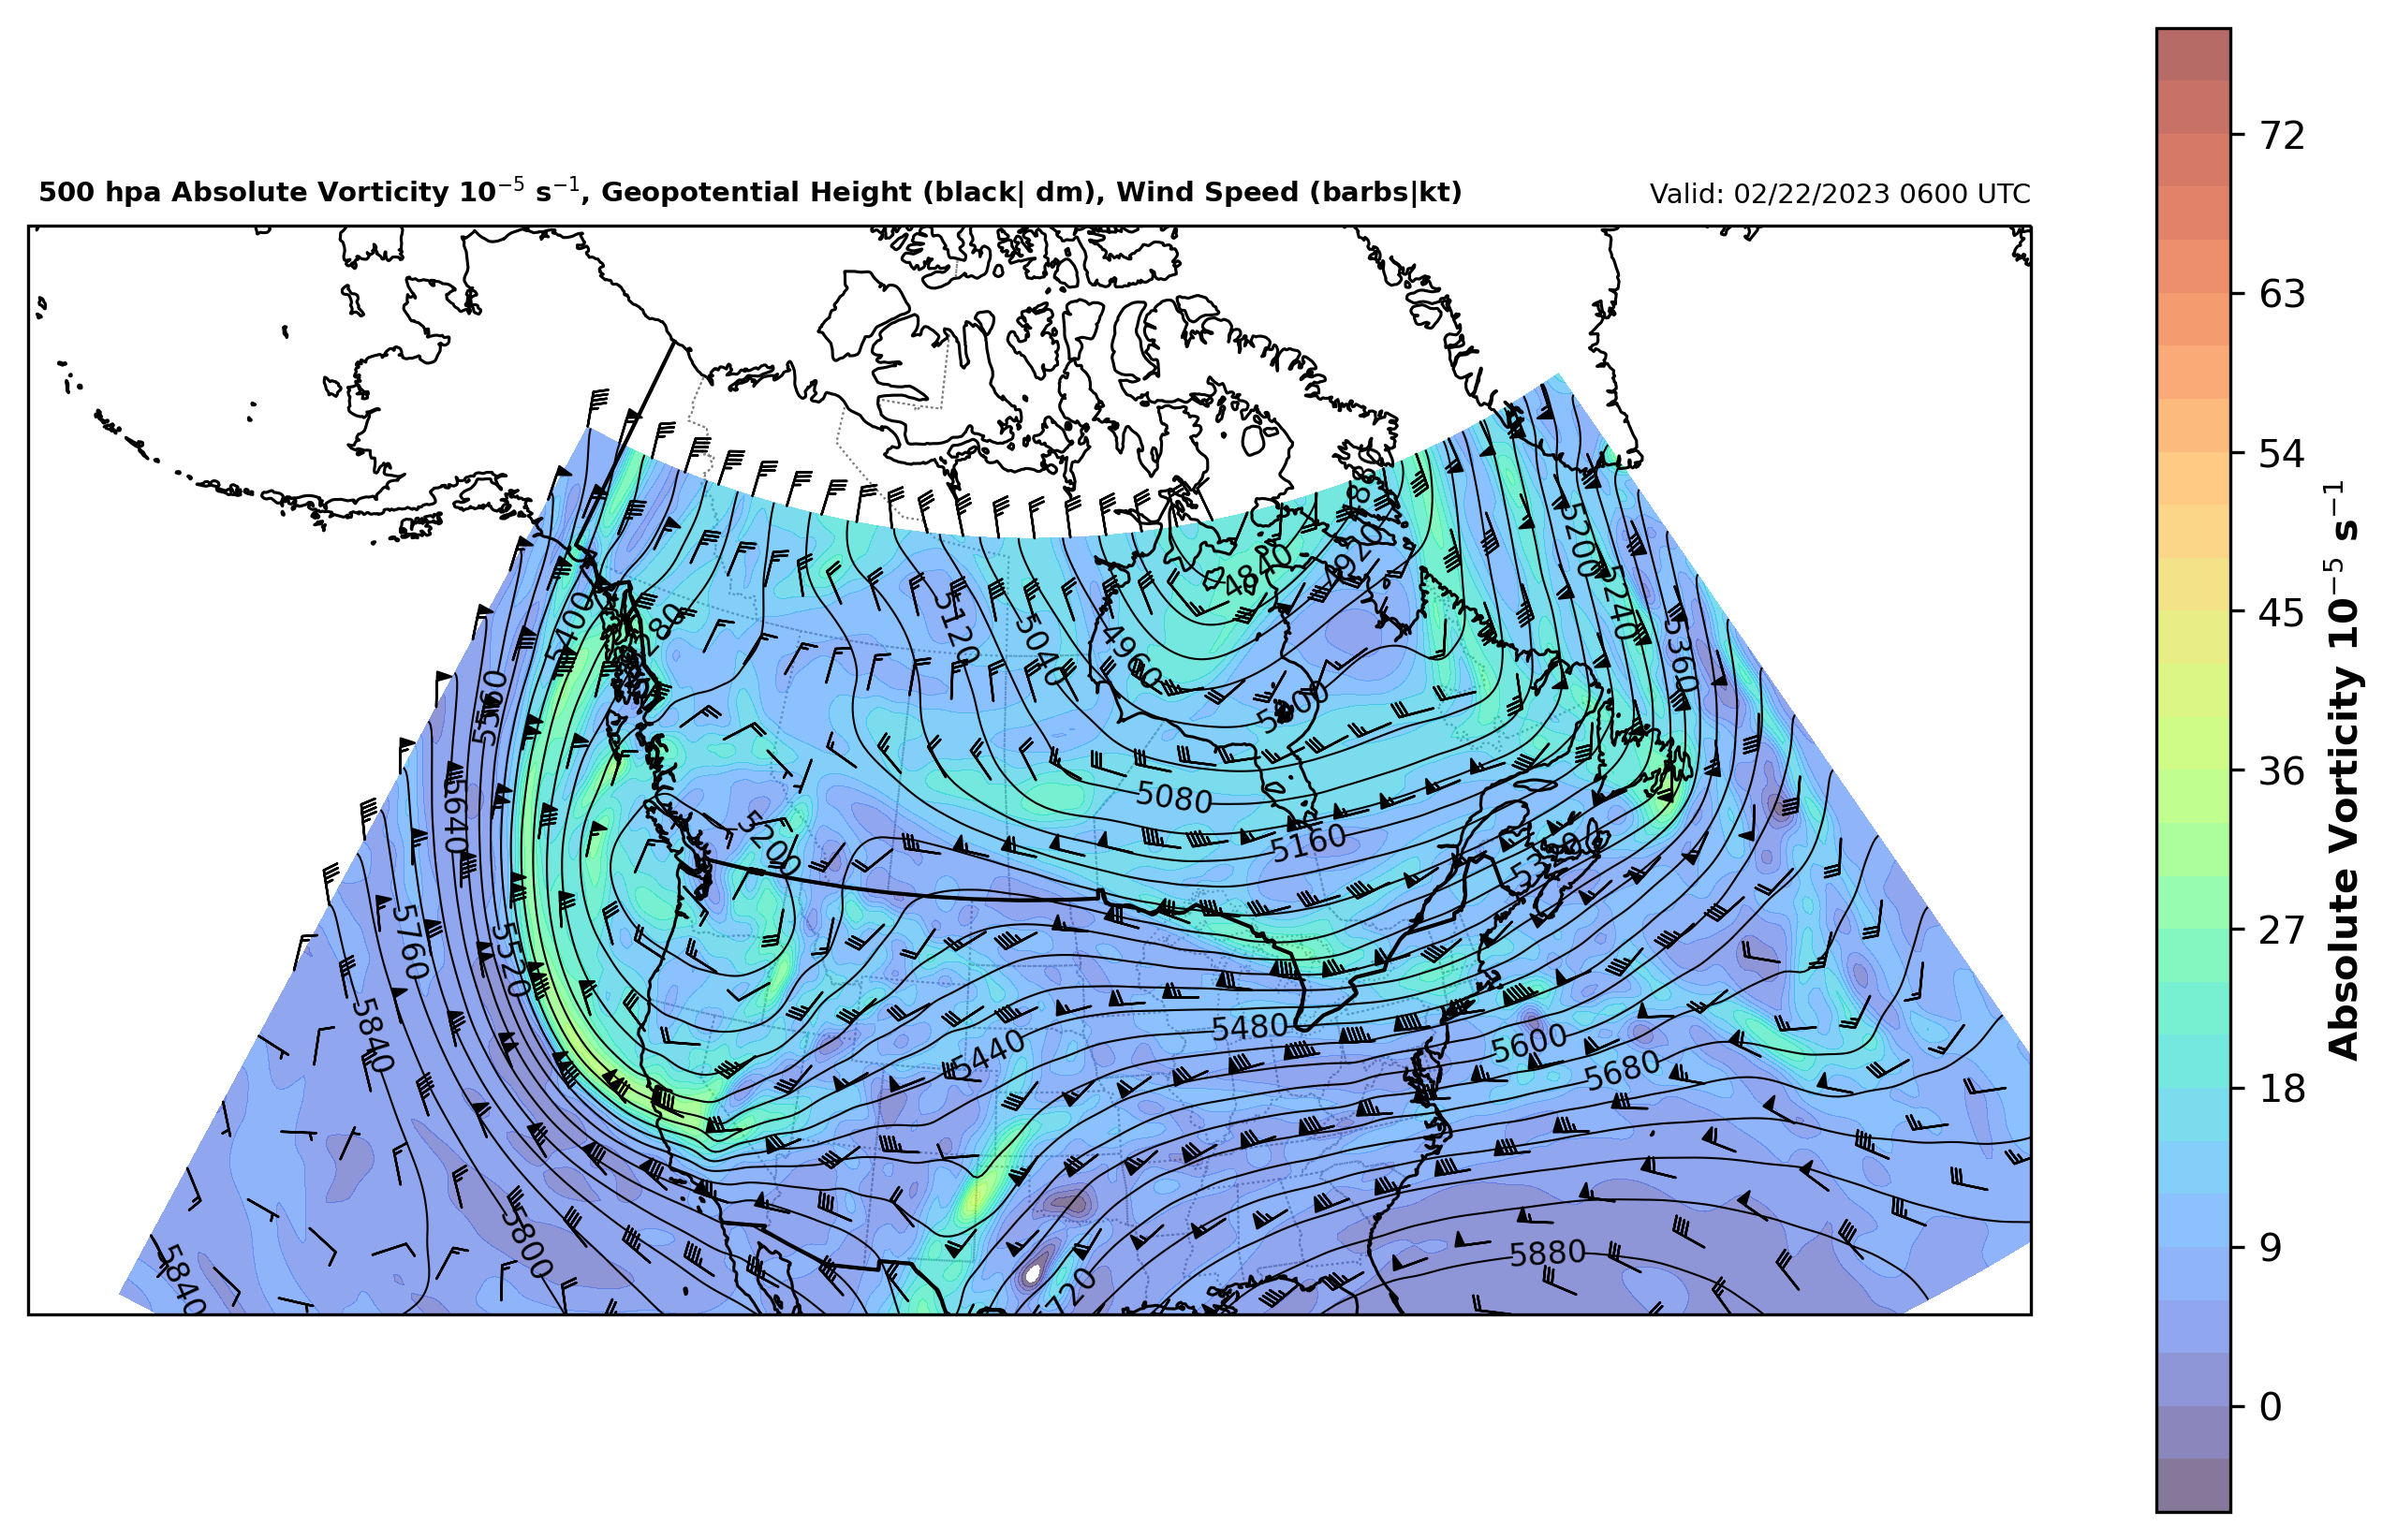

In [5]:
#Call data processing and plotting function for both times used
time=datetime(2023,2,22,0)
model_data=process_upper_air_data(time)
plot_vort_gh(time, model_data)

time=datetime(2023,2,22,6)
model_data=process_upper_air_data(time)
plot_vort_gh(time, model_data)

Can't create file '/data/AtmSci360/Synp2/Lab_2/022223_12_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/opt/tljh/user/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/data/AtmSci360/Synp2/Lab_2/022223_12_gfs.grib2.923a8.idx'
Can't read index file '/data/AtmSci360/Synp2/Lab_2/022223_12_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 544, in from_indexpath_or_filestream
    index_mtime = os.path.getmtime(indexpath)
  File "/opt/tljh/user/lib/python3.7/genericpath.py", 

/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:982: ShapelyDeprecatio

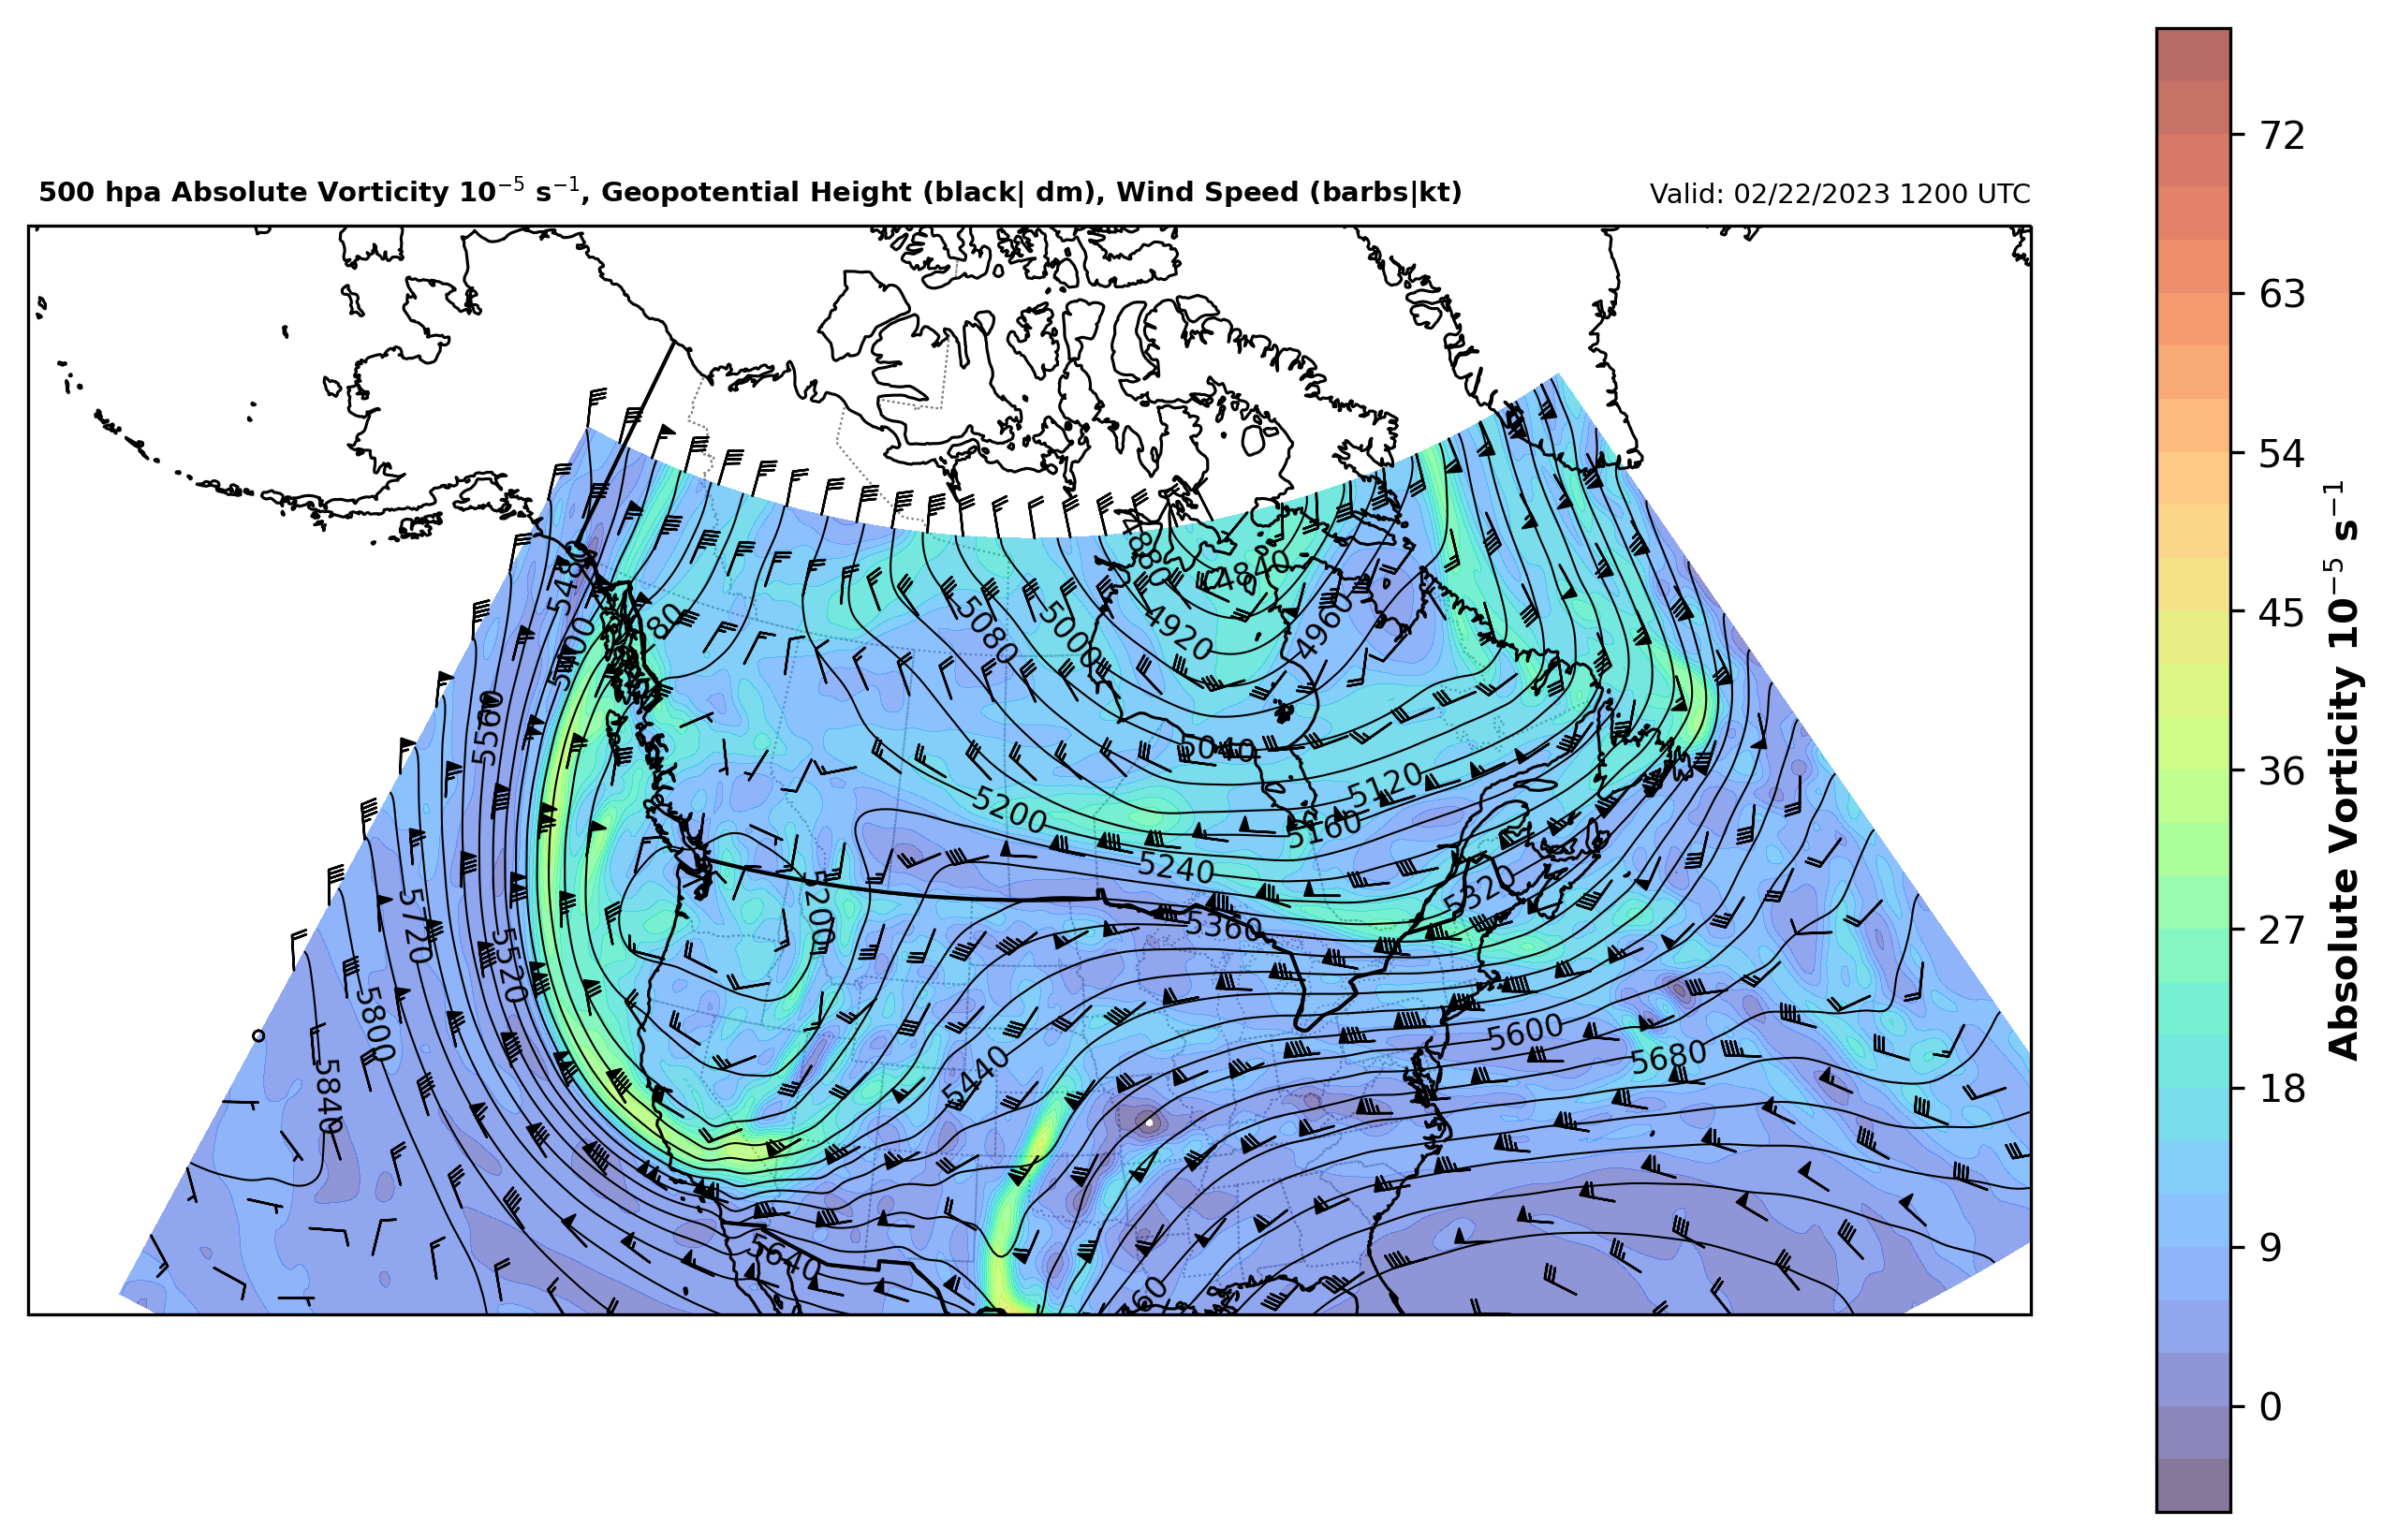

In [6]:
time=datetime(2023,2,22,12)
model_data=process_upper_air_data(time)
plot_vort_gh(time, model_data)